In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('BankChurners_clean.csv')

# Display the first few rows of the dataset
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


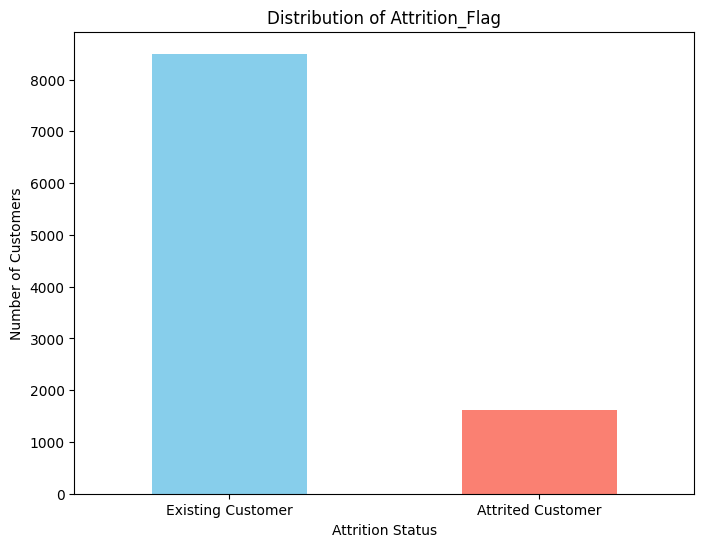

In [9]:
import matplotlib.pyplot as plt

# Check the distribution of the target variable 'Attrition_Flag'
attrition_counts = df['Attrition_Flag'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
attrition_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Attrition_Flag')
plt.xlabel('Attrition Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x700 with 0 Axes>

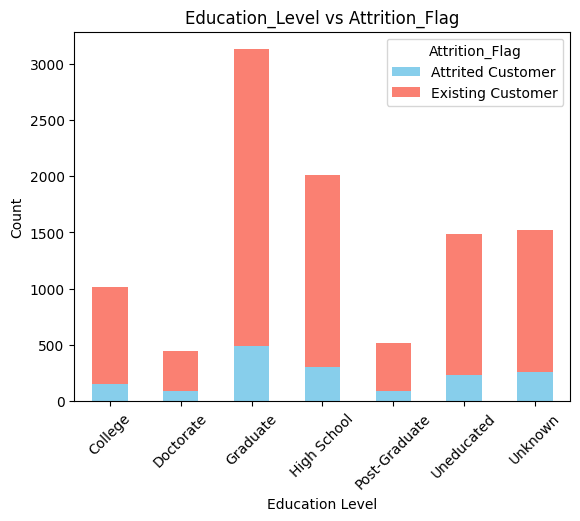

<Figure size 1000x700 with 0 Axes>

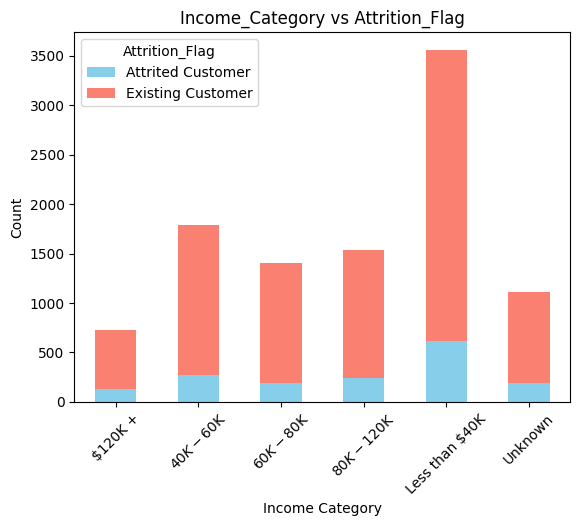

In [10]:
# Education_Level vs Attrition_Flag
plt.figure(figsize=(10, 7))
df.groupby('Education_Level')['Attrition_Flag'].value_counts().unstack().plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Education_Level vs Attrition_Flag')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition_Flag')
plt.show()

# Income_Category vs Attrition_Flag
plt.figure(figsize=(10, 7))
df.groupby('Income_Category')['Attrition_Flag'].value_counts().unstack().plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Income_Category vs Attrition_Flag')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition_Flag')
plt.show()

In [11]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values, if any
missing_values[missing_values > 0]

Series([], dtype: int64)

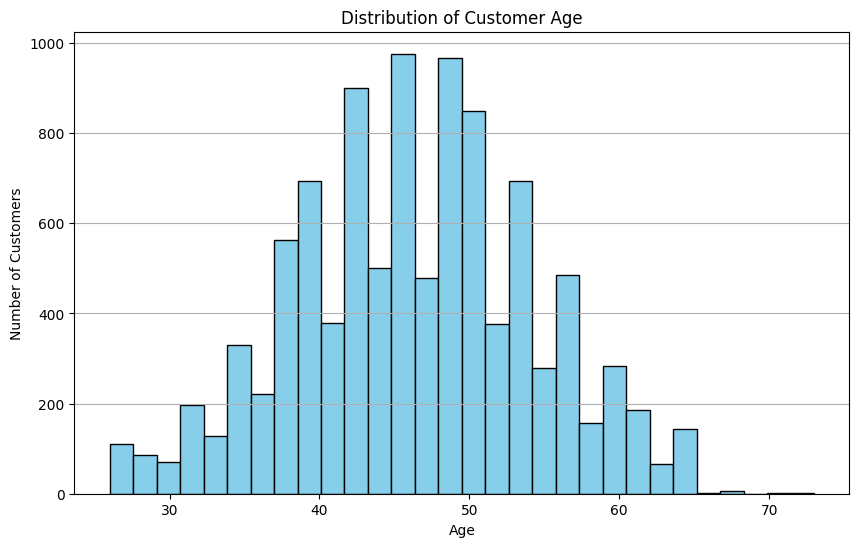

In [12]:
# Plot the distribution of 'Customer_Age'
plt.figure(figsize=(10, 6))
plt.hist(df['Customer_Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

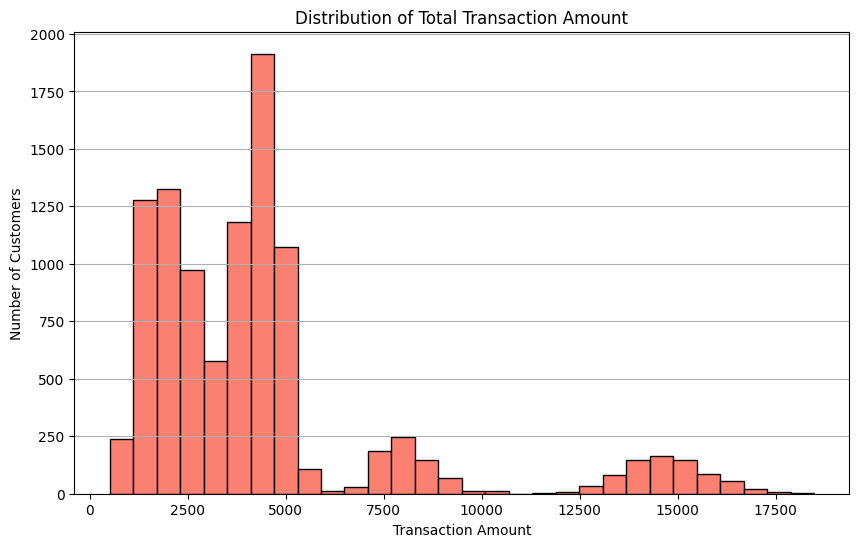

In [13]:
# Plot the distribution of 'Total_Trans_Amt'
plt.figure(figsize=(10, 6))
plt.hist(df['Total_Trans_Amt'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Total Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode categorical variables using label encoding
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display the first few rows of the dataset after encoding
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [15]:
# Scale the numerical features
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('CLIENTNUM')  # Exclude 'CLIENTNUM' as it's an identifier
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the first few rows of the dataset after scaling
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,-0.165406,1,0.503368,3,1,2,0,0.384621,...,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,818770008,1,0.333570,0,2.043199,2,2,4,0,1.010715,...,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,713982108,1,0.583058,1,0.503368,2,1,3,0,0.008965,...,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,769911858,1,-0.789126,0,1.273283,3,3,4,0,-0.241473,...,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,709106358,1,-0.789126,1,0.503368,5,1,2,0,-1.869317,...,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155


In [16]:
# Split the data into training and testing sets
X = df.drop(['CLIENTNUM', 'Attrition_Flag'], axis=1)  # Features (excluding identifier and target variable)
y = df['Attrition_Flag']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8101, 19), (2026, 19), (8101,), (2026,))

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

rf_accuracy, rf_report

(0.9619940769990128,
 '              precision    recall  f1-score   support\n\n           0       0.91      0.84      0.88       325\n           1       0.97      0.98      0.98      1701\n\n    accuracy                           0.96      2026\n   macro avg       0.94      0.91      0.93      2026\nweighted avg       0.96      0.96      0.96      2026\n')

In [18]:
# Check the unique values in the 'Attrition_Flag' column
df['Attrition_Flag'].unique()

array([1, 0])

In [19]:
# Reverse the scaling for 'Attrition_Flag' column
df['Attrition_Flag'] = label_encoders['Attrition_Flag'].inverse_transform(df['Attrition_Flag'].astype(int))

# Re-encode 'Attrition_Flag' to binary values
df['Attrition_Flag'] = label_encoders['Attrition_Flag'].transform(df['Attrition_Flag'])

# Split the data again into training and testing sets
X = df.drop(['CLIENTNUM', 'Attrition_Flag'], axis=1)
y = df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the unique values in the 'Attrition_Flag' column again
df['Attrition_Flag'].unique()

array([1, 0])

In [20]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

rf_accuracy, rf_report

(0.9619940769990128,
 '              precision    recall  f1-score   support\n\n           0       0.91      0.84      0.88       325\n           1       0.97      0.98      0.98      1701\n\n    accuracy                           0.96      2026\n   macro avg       0.94      0.91      0.93      2026\nweighted avg       0.96      0.96      0.96      2026\n')

In [21]:
# Identify categorical columns in the dataset
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode the identified categorical columns
for col in categorical_cols:
    if col not in label_encoders:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Split the data again into training and testing sets
X = df.drop(['CLIENTNUM', 'Attrition_Flag'], axis=1)
y = df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the data types of the columns in the dataset
df.dtypes

CLIENTNUM                     int64
Attrition_Flag                int32
Customer_Age                float64
Gender                        int32
Dependent_count             float64
Education_Level               int32
Marital_Status                int32
Income_Category               int32
Card_Category                 int32
Months_on_book              float64
Total_Relationship_Count    float64
Months_Inactive_12_mon      float64
Contacts_Count_12_mon       float64
Credit_Limit                float64
Total_Revolving_Bal         float64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt             float64
Total_Trans_Ct              float64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [22]:
# Identify and encode any remaining categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        if col not in label_encoders:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            label_encoders[col] = le
        else:
            df[col] = label_encoders[col].transform(df[col])

# Split the data again into training and testing sets
X = df.drop(['CLIENTNUM', 'Attrition_Flag'], axis=1)
y = df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

rf_accuracy, rf_report

(0.9619940769990128,
 '              precision    recall  f1-score   support\n\n           0       0.91      0.84      0.88       325\n           1       0.97      0.98      0.98      1701\n\n    accuracy                           0.96      2026\n   macro avg       0.94      0.91      0.93      2026\nweighted avg       0.96      0.96      0.96      2026\n')

In [23]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Predict on the testing data
xgb_predictions = xgb_classifier.predict(X_test)

# Evaluate the performance
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_report = classification_report(y_test, xgb_predictions)

xgb_accuracy, xgb_report

c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

(0.9718657453109576,
 '              precision    recall  f1-score   support\n\n           0       0.92      0.90      0.91       325\n           1       0.98      0.98      0.98      1701\n\n    accuracy                           0.97      2026\n   macro avg       0.95      0.94      0.95      2026\nweighted avg       0.97      0.97      0.97      2026\n')

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)

rf_accuracy, rf_classification_report

(0.9619940769990128,
 '              precision    recall  f1-score   support\n\n           0       0.91      0.84      0.88       325\n           1       0.97      0.98      0.98      1701\n\n    accuracy                           0.96      2026\n   macro avg       0.94      0.91      0.93      2026\nweighted avg       0.96      0.96      0.96      2026\n')

In [25]:
import xgboost as xgb

# Initialize and train the XGBoost classifier again
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)

# Predict on the testing set
xgb_predictions = xgb_classifier.predict(X_test)

# Evaluate the performance
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_classification_report = classification_report(y_test, xgb_predictions)

xgb_accuracy, xgb_classification_report

c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

(0.9718657453109576,
 '              precision    recall  f1-score   support\n\n           0       0.92      0.90      0.91       325\n           1       0.98      0.98      0.98      1701\n\n    accuracy                           0.97      2026\n   macro avg       0.95      0.94      0.95      2026\nweighted avg       0.97      0.97      0.97      2026\n')

## Hyperparameter Tuning

Hyperparameter tuning is the process of systematically searching for the best combination of hyperparameters that optimize a model's performance on a given task. Unlike model parameters, which are learned during training, hyperparameters are set before training and control various aspects of the training process.

### Why Hyperparameter Tuning?
- **Optimize Model Performance**: While default hyperparameters can provide good performance, tuning can often lead to better results.
- **Avoid Overfitting**: Properly tuned hyperparameters can help in regularizing the model and prevent overfitting.
- **Customization**: Different datasets and tasks might require different hyperparameters. Tuning allows customization to the specific characteristics of the data.

In this project, given the importance of accurately predicting customer churn, it's crucial to ensure our models are performing at their best. Even slight improvements in accuracy or recall can translate to significant benefits for the bank in terms of customer retention. Therefore, we'll proceed with hyperparameter tuning for our models.

In [26]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter grid for XGBoost
param_dist = {
    'learning_rate': np.linspace(0.01, 1, 10),
    'max_depth': np.arange(3, 10),
    'n_estimators': np.arange(50, 200, 50),
    'gamma': np.linspace(0, 0.5, 5),
    'subsample': np.linspace(0.5, 1, 5),
    'colsample_bytree': np.linspace(0.5, 1, 5)
}

# Initialize RandomizedSearchCV with XGBoost
xgb_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist, n_iter=50, scoring='accuracy', n_jobs=-1, cv=3, random_state=42)

# Fit the model
xgb_search.fit(X_train, y_train)

# Get the best parameters and best score
xgb_best_params = xgb_search.best_params_
xgb_best_score = xgb_search.best_score_

xgb_best_params, xgb_best_score

c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

({'subsample': 0.75,
  'n_estimators': 100,
  'max_depth': 3,
  'learning_rate': 0.23,
  'gamma': 0.125,
  'colsample_bytree': 0.5},
 0.9709912195300324)

In [27]:
# Use the best estimator from the RandomizedSearchCV to predict on the testing set
xgb_best_predictions = xgb_search.best_estimator_.predict(X_test)

# Evaluate the performance of the tuned XGBoost model
xgb_best_accuracy = accuracy_score(y_test, xgb_best_predictions)
xgb_best_classification_report = classification_report(y_test, xgb_best_predictions)

xgb_best_accuracy, xgb_best_classification_report

c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

(0.9698914116485686,
 '              precision    recall  f1-score   support\n\n           0       0.92      0.89      0.90       325\n           1       0.98      0.98      0.98      1701\n\n    accuracy                           0.97      2026\n   macro avg       0.95      0.94      0.94      2026\nweighted avg       0.97      0.97      0.97      2026\n')

In [28]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for Random Forest
param_dist_rf = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': np.arange(3, 10),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 10),
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV with Random Forest
rf_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist_rf, n_iter=50, scoring='accuracy', n_jobs=-1, cv=3, random_state=42)

# Fit the model
rf_search.fit(X_train, y_train)

# Get the best parameters and best score
rf_best_params = rf_search.best_params_
rf_best_score = rf_search.best_score_

rf_best_params, rf_best_score

({'n_estimators': 50,
  'min_samples_split': 7,
  'min_samples_leaf': 2,
  'max_depth': 9,
  'bootstrap': False},
 0.9508702766693634)

In [29]:
# Use the best estimator from the RandomizedSearchCV to predict on the testing set
rf_best_predictions = rf_search.best_estimator_.predict(X_test)

# Evaluate the performance of the tuned Random Forest model
rf_best_accuracy = accuracy_score(y_test, rf_best_predictions)
rf_best_classification_report = classification_report(y_test, rf_best_predictions)

rf_best_accuracy, rf_best_classification_report

(0.9511352418558736,
 '              precision    recall  f1-score   support\n\n           0       0.91      0.77      0.83       325\n           1       0.96      0.99      0.97      1701\n\n    accuracy                           0.95      2026\n   macro avg       0.93      0.88      0.90      2026\nweighted avg       0.95      0.95      0.95      2026\n')

c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\sklearn\cluster\_kme

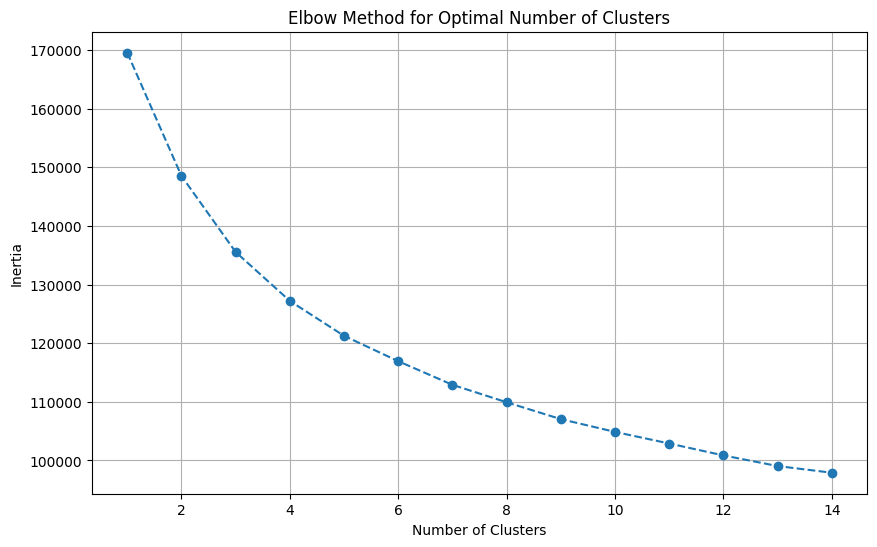

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method
inertia = []
clusters_range = range(1, 15)

for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [31]:
# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train)

# Add the cluster labels to the training data for analysis
X_train_clustered = X_train.copy()
X_train_clustered['Cluster'] = clusters

# Get the mean values of each feature for each cluster
cluster_characteristics = X_train_clustered.groupby('Cluster').mean()
cluster_characteristics

c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Cluster,,,,,,,,,,,,,,,,,,,
0,0.018537,0.891892,0.171656,2.974563,1.545310,1.899046,0.926073,0.020511,-0.234856,-0.040265,0.004463,1.953601,0.012846,1.952039,-0.021169,0.507697,0.315262,-0.048353,-0.820201
1,-0.003868,0.406061,-0.013953,5.313939,1.460202,3.005253,0.058182,-0.012032,0.040256,0.001444,-0.005081,-0.318277,-0.009471,-0.317361,0.012420,-0.063271,-0.046156,0.022663,0.128555
2,-0.002879,0.391941,-0.035291,1.894231,1.443681,3.038462,0.040064,0.003202,0.054740,0.000404,-0.007415,-0.381433,0.000776,-0.381422,-0.000489,-0.116406,-0.073055,-0.001300,0.158295


## Analysis of Clusters

We applied the KMeans clustering algorithm and identified three distinct clusters of customers. The choice of three clusters was based on the Elbow method, which helps determine the optimal number of clusters by looking at the inertia (sum of squared distances) for different cluster numbers. The point where the inertia starts to level off suggests the optimal number of clusters.

Here's a summary of the characteristics of each cluster based on the mean values of the features:

- **Cluster 1**:
  - Lower `Credit_Limit` and `Avg_Open_To_Buy`.
  - Lower `Total_Trans_Amt` and `Total_Trans_Ct`.
  - Higher `Avg_Utilization_Ratio`.
  - This cluster might represent customers with lower credit limits who utilize a significant portion of their available credit.

- **Cluster 2**:
  - Higher `Credit_Limit` and `Avg_Open_To_Buy`.
  - Higher `Total_Trans_Amt` and `Total_Trans_Ct`.
  - Lower `Avg_Utilization_Ratio`.
  - This cluster might represent premium customers with higher credit limits who are more active in terms of transactions but utilize a smaller portion of their available credit.

- **Cluster 0**:
  - Moderate `Credit_Limit` and `Avg_Open_To_Buy`.
  - Moderate `Total_Trans_Amt` and `Total_Trans_Ct`.
  - Moderate `Avg_Utilization_Ratio`.
  - This cluster might represent the average customer segment with balanced characteristics.

These clusters can be used by the marketing team to design targeted campaigns for each customer segment, addressing their unique characteristics and needs.

In [32]:
# Extract feature importances from the tuned XGBoost and Random Forest models
xgb_feature_importance = xgb_search.best_estimator_.feature_importances_
rf_feature_importance = rf_search.best_estimator_.feature_importances_

# Create a DataFrame for feature importances
feature_names = X_train.columns
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'XGBoost Importance': xgb_feature_importance,
    'Random Forest Importance': rf_feature_importance
}).sort_values(by='XGBoost Importance', ascending=False)

# Display the feature importances
feature_importances

,Feature,XGBoost Importance,Random Forest Importance
12,Total_Revolving_Bal,0.165074,0.133497
16,Total_Trans_Ct,0.158495,0.184783
17,Total_Ct_Chng_Q4_Q1,0.120010,0.141888
15,Total_Trans_Amt,0.106553,0.222793
8,Total_Relationship_Count,0.097896,0.071154
9,Months_Inactive_12_mon,0.064437,0.022487
14,Total_Amt_Chng_Q4_Q1,0.050136,0.046119
10,Contacts_Count_12_mon,0.039126,0.025872
0,Customer_Age,0.031767,0.021468
1,Gender,0.031067,0.005761


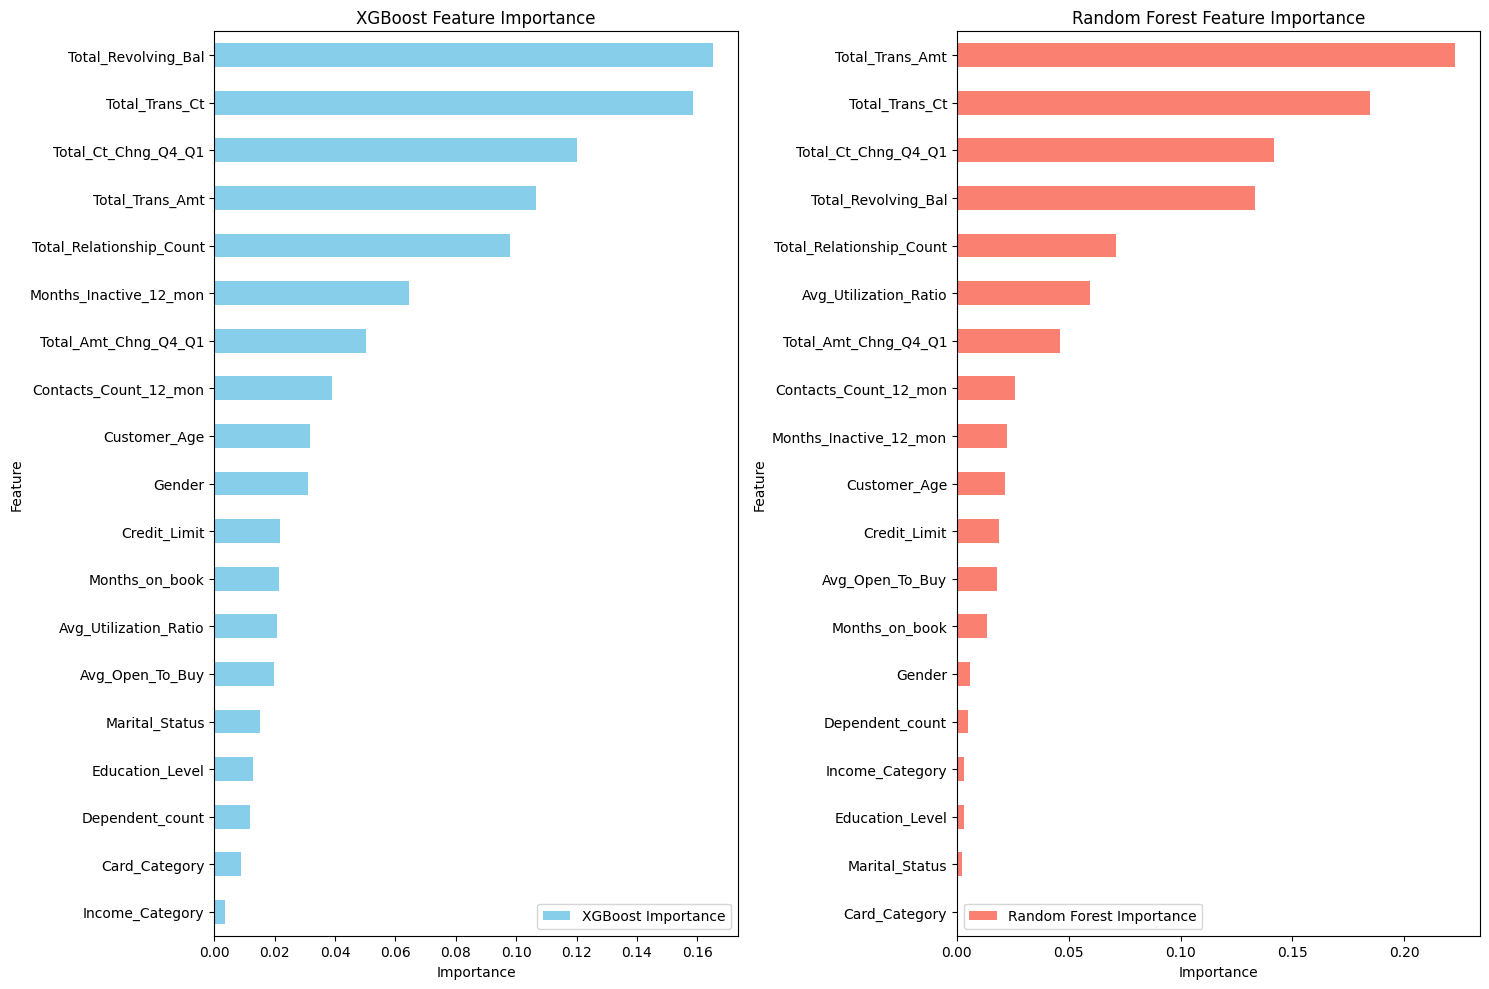

In [33]:
# Visualize the feature importances for XGBoost and Random Forest models
plt.figure(figsize=(15, 10))

# XGBoost Feature Importance
plt.subplot(1, 2, 1)
feature_importances.sort_values(by='XGBoost Importance', ascending=True).plot.barh(y='XGBoost Importance', x='Feature', ax=plt.gca(), color='skyblue')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')

# Random Forest Feature Importance
plt.subplot(1, 2, 2)
feature_importances.sort_values(by='Random Forest Importance', ascending=True).plot.barh(y='Random Forest Importance', x='Feature', ax=plt.gca(), color='salmon')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')

plt.tight_layout()
plt.show()